## Import necessary libraires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

## Import the dataset

In [2]:
books = pd.read_csv('books.csv')

ParserError: Error tokenizing data. C error: Expected 12 fields in line 3350, saw 13


In [3]:
books = pd.read_csv('books.csv', error_bad_lines = False)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


## Let's check the number of rows and columns in our dataset

In [4]:
print("There are ", books.shape[0], "number of ROWS and ", 
      books.shape[1], "number of COLUMNS!")

There are  11123 number of ROWS and  12 number of COLUMNS!


In [5]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
1,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
2,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown
3,16,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams/Stephen Fry,4.22,0739322206,9780739322208,eng,6,1266,253,3/23/2005,Random House Audio
4,18,The Ultimate Hitchhiker's Guide (Hitchhiker's ...,Douglas Adams,4.38,0517149257,9780517149256,eng,815,2877,195,1/17/1996,Wings Books


In [6]:
books.sample(n = 5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6861,25849,The Drifting Classroom Vol. 1,Kazuo Umezu,3.79,1421507226,9781421507224,en-US,190,1535,107,8/8/2006,VIZ Media LLC
5503,19909,Master of the Night (Mageverse #1),Angela Knight,3.88,0425198804,9780425198803,eng,296,4637,125,10/5/2004,Berkley Sensation
9900,39899,Arms and Armor: A Pictorial Archive from Ninet...,Carol Belanger Grafton,3.96,0486285618,9780486285610,eng,128,26,1,7/25/1995,Dover Publications
4350,15647,The Inferno of Dante: A New Verse Translation ...,Dante Alighieri/Robert Pinsky/Michael Mazur,4.00,0374525315,9780374525316,mul,464,657,94,9/1/1997,Farrar Straus and Giroux
3422,12497,No Country for Old Men,Cormac McCarthy,4.14,0375706674,9780375706677,eng,309,120421,6140,7/11/2006,Vintage


## Check for the variables in this dataset

In [7]:
books.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

## Questions I want to uncover using this data :
1. Do books from certain publisher/author tend to have high ratings?
2. Which books from certain period are have more rating?
3. Can more ratings mean that the book is more popular?

## Before finding solutions to our questions, let's see if our data is suitable to help us

## Check for null values

In [8]:
books.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

None, great!

In [9]:
books.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [10]:
books.describe(include = "all")

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
count,11123.000000,11123,11123,11123.000000,11123,1.112300e+04,11123,11123.000000,1.112300e+04,11123.000000,11123,11123
unique,NaN,10348,6639,NaN,11123,NaN,27,NaN,NaN,NaN,3679,2290
top,NaN,The Brothers Karamazov,Stephen King,NaN,1843537206,NaN,eng,NaN,NaN,NaN,10/1/2005,Vintage
freq,NaN,9,40,NaN,1,NaN,8908,NaN,NaN,NaN,56,318
mean,21310.856963,NaN,NaN,3.934075,NaN,9.759880e+12,NaN,336.405556,1.794285e+04,542.048099,NaN,NaN
std,13094.727252,NaN,NaN,0.350485,NaN,4.429758e+11,NaN,241.152626,1.124992e+05,2576.619589,NaN,NaN
min,1.000000,NaN,NaN,0.000000,NaN,8.987060e+09,NaN,0.000000,0.000000e+00,0.000000,NaN,NaN
25%,10277.500000,NaN,NaN,3.770000,NaN,9.780345e+12,NaN,192.000000,1.040000e+02,9.000000,NaN,NaN
50%,20287.000000,NaN,NaN,3.960000,NaN,9.780582e+12,NaN,299.000000,7.450000e+02,47.000000,NaN,NaN
75%,32104.500000,NaN,NaN,4.140000,NaN,9.780872e+12,NaN,416.000000,5.000500e+03,238.000000,NaN,NaN


In [11]:
books.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [12]:
books.bookID = books.bookID.astype('str')

In [13]:
books.title = books.title.astype('str')

In [14]:
books.authors = books.authors.astype('str')

In [15]:
books.language_code  = books.language_code.astype('category')

In [16]:
books.title = books.title.astype('str')

In [17]:
books.average_rating = books.average_rating.astype('float64')

In [18]:
books.num_pages = books.num_pages.astype('int64')

AttributeError: 'DataFrame' object has no attribute 'num_pages'

In [19]:
books.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [20]:
books.columns = ['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher']

In [21]:
books.num_pages = books.num_pages.astype('int64')

In [22]:
books.publication_date = [d.date().strftime("%d/%m/%Y") for d in pd.to_datetime(books.publication_date.astype(str), format='%M/%d/%Y')]

In [75]:
books.publisher  = books.publisher.astype('str')

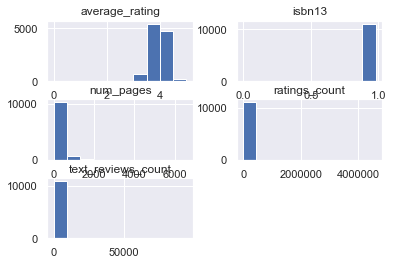

In [24]:
books.hist();

In [25]:
publisher_rating = pd.DataFrame(books.groupby(['publisher'], as_index = False).mean()[['publisher', 'average_rating']]).reset_index(drop=True)


In [26]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,01/01/2005,Gramercy Books
1,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,30/01/2002,Del Rey Books
2,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,03/01/2004,Crown
3,16,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams/Stephen Fry,4.22,0739322206,9780739322208,eng,6,1266,253,23/01/2005,Random House Audio
4,18,The Ultimate Hitchhiker's Guide (Hitchhiker's ...,Douglas Adams,4.38,0517149257,9780517149256,eng,815,2877,195,17/01/1996,Wings Books


## Questions I want to uncover using this data :
1. Do books from certain publisher/author tend to have high ratings?
2. Which books from certain period are have more rating?
3. Can more ratings mean that the book is more popular?

In [125]:
# 1. 
publisher_avg_rating = pd.DataFrame(books.groupby('authors', as_index = False).mean()[['authors', 'average_rating']].sort_values(by = 'average_rating')).reset_index(drop=True)
publisher_avg_rating_5 = publisher_avg_rating[publisher_avg_rating.average_rating == 5]
publisher_avg_rating_grte_4_5 = publisher_avg_rating[publisher_avg_rating.average_rating >=4.5][publisher_avg_rating.average_rating != 5]

author_avg_rating = pd.DataFrame(books.groupby('authors', as_index = False).mean()[['authors', 'average_rating']].sort_values(by = 'average_rating')).reset_index(drop=True)
author_avg_rating_5 = author_avg_rating[author_avg_rating.average_rating == 5]
author_avg_rating_grte_4_7 = author_avg_rating[author_avg_rating.average_rating >=4.7][author_avg_rating.average_rating != 5]




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [118]:
print("Publishers who have their average ratings = 5 : \n\n", publisher_avg_rating_5.reset_index(drop = True))

Publishers who have their average ratings = 5 : 

                           publisher  average_rating
0                           Y Lolfa             5.0
1   University Press of New England             5.0
2                   Chartwell Books             5.0
3                   T&T Clark Int'l             5.0
4        Texas A&M University Press             5.0
5             Square One Publishers             5.0
6                          Raintree             5.0
7                   Academica Press             5.0
8                    Schirmer Mosel             5.0
9               Boosey & Hawkes Inc             5.0
10                    Courage Books             5.0
11                    Vantage Press             5.0


In [124]:
print("\n\nPublishers who have their average ratings >= 4.5 : \n\n", publisher_avg_rating_grte_4_5.reset_index(drop = True))



Publishers who have their average ratings >= 4.5 : 

                                   authors  average_rating
0                           Charles Allen            4.50
1                Joan Didion/John Leonard            4.50
2                              Tim Bogenn            4.50
3                              Chet Green            4.50
4                 Sherry Gershon Gottlieb            4.50
..                                    ...             ...
105     Don Macmillan/Wayne G. Broehl Jr.            4.75
106  Henry David Thoreau/Barry M. Andrews            4.75
107                          Jerry Burton            4.83
108                Alice Wong/Lena Tabori            4.88
109                       Simon Cleveland            4.91

[110 rows x 2 columns]


In [126]:
print("\n\nPublishers who have their average ratings = 5 : \n\n", author_avg_rating_5.reset_index(drop = True))
print("\n\nPublishers who have their average ratings >= 4.7 : \n\n", author_avg_rating_grte_4_7.reset_index(drop = True))



Publishers who have their average ratings = 5 : 

                                               authors  average_rating
0                                     Elena N. Mahlow             5.0
1                                      R. McL. Wilson             5.0
2                                        Ross Garnaut             5.0
3                                  William C. Dowling             5.0
4                                   James E. Campbell             5.0
5   Laura Driscoll/Alisa Klayman-Grodsky/Eric     ...             5.0
6                                       John  Diamond             5.0
7                                       Keith Donohue             5.0
8                     Julie Sylvester/David Sylvester             5.0
9                     Ian        Martin/Katie Elliott             5.0
10                               Todd Davis/Marc Frey             5.0
11                Aristophanes/F.W. Hall/W.M. Geldart             5.0
12                                   

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
linReg = LinearRegression